<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/neural_networks/projects/CNN_PlantSpeciesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its 
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's 
species from a photo.


### Step 1 - Import the libraries, load dataset, print shape of data, visualize the images in dataset

In [265]:
#import libraries
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from google.colab import drive
from keras.utils import to_categorical
from google.colab.patches import cv2_imshow

from tensorflow.keras.layers import Conv2D

In [266]:
# mount google drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
# load datasets
data = np.load('/content/drive/MyDrive/AIProjectData/images.npy')
labeldata =  pd.read_csv('/content/drive/MyDrive/AIProjectData/Labels.csv')

In [268]:
# shape of data
data.shape

(4750, 128, 128, 3)

In [269]:
labeldata.shape

(4750, 1)

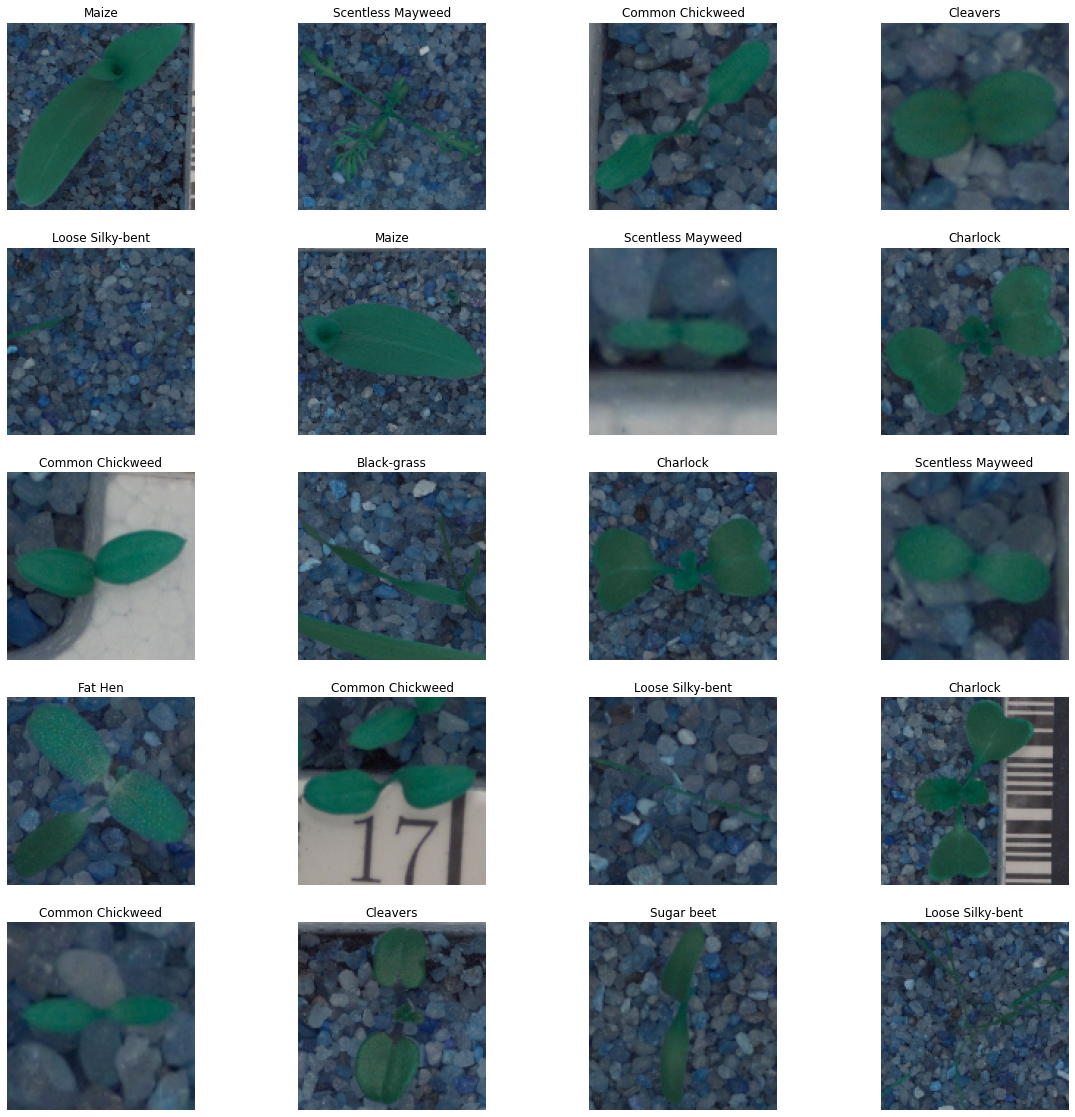

In [270]:
#visualize images in dataset
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(len(data))
    fig.add_subplot(rows, columns, i)
    plt.imshow(data[img])
    plt.title(labeldata.values[img][0])
    plt.axis('off')
plt.show()

### Step 2 - Data Pre-processing

#### Step 2.b - Gaussian Blurring

In [271]:
#take a copy of image data
ppdata = data.copy()

#perform gaussian blurring for every image
for x in range(len(data)):  
  ppdata[x] = cv2.GaussianBlur(data[x], (5, 5), 0)

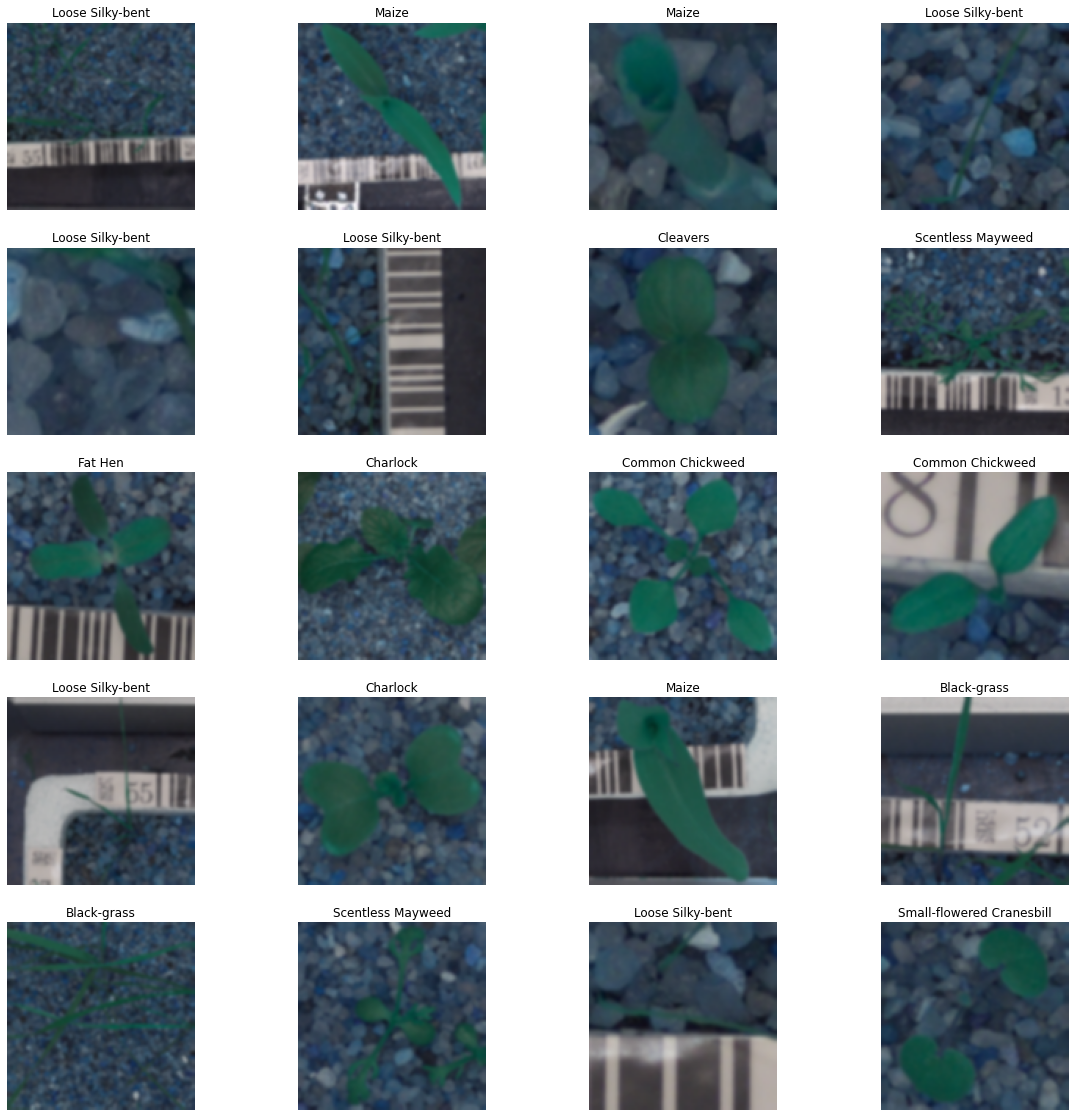

In [272]:
#visualize images in dataset after gaussian blurring
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(len(ppdata))
    fig.add_subplot(rows, columns, i)
    plt.imshow(ppdata[img])
    plt.title(labeldata.values[img][0])
    plt.axis('off')
plt.show()

#### Step 2.a - Normalization

In [273]:
ppdata = ppdata.astype('float32')
ppdata /= 255

In [274]:
print('Min: %.3f, Max: %.3f' % (ppdata.min(), ppdata.max()))

Min: 0.000, Max: 1.000


#### Step 2.c - Visualize data after pre-processing

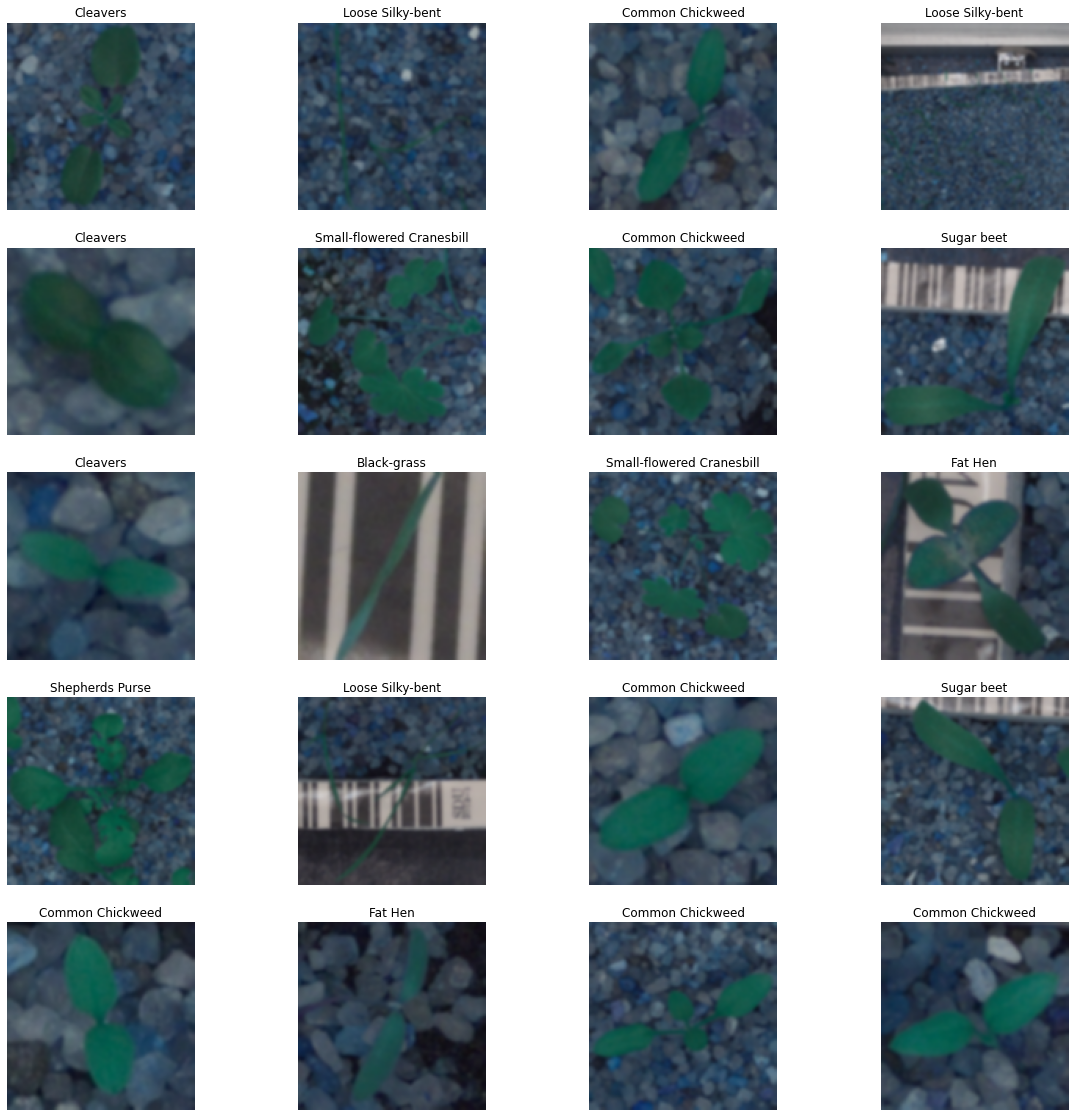

In [275]:
#visualize images in dataset after gaussian blurring
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(len(ppdata))
    fig.add_subplot(rows, columns, i)
    plt.imshow(ppdata[img])
    plt.title(labeldata.values[img][0])
    plt.axis('off')
plt.show()

### Step 3 - Make data compatible

#### Step 3.a - Convert labels to one-hot-vectors

In [276]:
pplabel = labeldata.copy()
unique_labels = pplabel.Label.unique()
labelArray = pplabel['Label']
### map each color to an integer
mapping = {}
for x in range(len(unique_labels)):
  mapping[unique_labels[x]] = x

# integer representation
for x in range(len(labelArray)):
  labelArray[x] = mapping[labelArray[x]]

one_hot_encode = to_categorical(labelArray)
print(one_hot_encode)
y_train = one_hot_encode

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [277]:
# validating the one hot encoding
for x in range(1, 10):
    i = np.random.randint(len(labeldata))
    print('Checking for index = ', i, 'expected = ', labeldata['Label'][i], 'actual = ', unique_labels[y_train[i].argmax()])


Checking for index =  2418 expected =  Charlock actual =  Charlock
Checking for index =  3796 expected =  Maize actual =  Maize
Checking for index =  3476 expected =  Sugar beet actual =  Sugar beet
Checking for index =  2783 expected =  Scentless Mayweed actual =  Scentless Mayweed
Checking for index =  1242 expected =  Common wheat actual =  Common wheat
Checking for index =  1760 expected =  Common Chickweed actual =  Common Chickweed
Checking for index =  24 expected =  Small-flowered Cranesbill actual =  Small-flowered Cranesbill
Checking for index =  964 expected =  Fat Hen actual =  Fat Hen
Checking for index =  2270 expected =  Charlock actual =  Charlock


#### Step 3.b - Print the label for y_train[0]

In [278]:
print('The label for y_train[0] is ', unique_labels[y_train[0].argmax()])


The label for y_train[0] is  Small-flowered Cranesbill


#### Step 3.c - Split the dataset into training, testing, and validation set

In [279]:
X_train, X_test, y_train, y_test = train_test_split(ppdata, one_hot_encode, test_size=0.30, random_state = 7)

In [280]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 7)

#### Step 3.d - Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s 
already in the compatible shape, then comment in the notebook that it’s already in compatible shape

In [281]:
print('Shape of X_train is ', X_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of X_val is ', X_val.shape)
print('Shape of y_test is ', y_test.shape)
print('Shape of y_val is ', y_val.shape)

Shape of X_train is  (3325, 128, 128, 3)
Shape of y_train is  (3325, 12)
Shape of X_test is  (712, 128, 128, 3)
Shape of X_val is  (713, 128, 128, 3)
Shape of y_test is  (712, 12)
Shape of y_val is  (713, 12)


Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c) where n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
The shape of training, test and validation data is in the expected format

### Step 4 - Building CNN


In [282]:
import tensorflow as tf

#### Step 4.a - Define layers

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(12, activation="softmax"))

#### Step 4.b - Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


In [284]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [285]:
y_test.shape

(712, 12)

In [286]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")


In [287]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 123008)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               15745152  
_________________________________________________________________
dense_27 (Dense)             (None, 12)              

### Step 5 - Fit and evaluate model and print confusion matrix

In [288]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
104/104 [==============================] - 4s 31ms/step - loss: 2.5229 - accuracy: 0.2596 - val_loss: 1.2898 - val_accuracy: 0.5632
Epoch 2/10
104/104 [==============================] - 3s 30ms/step - loss: 1.1559 - accuracy: 0.6048 - val_loss: 1.1075 - val_accuracy: 0.6081
Epoch 3/10
104/104 [==============================] - 3s 30ms/step - loss: 0.7990 - accuracy: 0.7282 - val_loss: 0.9931 - val_accuracy: 0.6531
Epoch 4/10
104/104 [==============================] - 3s 30ms/step - loss: 0.6523 - accuracy: 0.7774 - val_loss: 0.9805 - val_accuracy: 0.6756
Epoch 5/10
104/104 [==============================] - 3s 30ms/step - loss: 0.4944 - accuracy: 0.8344 - val_loss: 1.2388 - val_accuracy: 0.6278
Epoch 6/10
104/104 [==============================] - 3s 30ms/step - loss: 0.3858 - accuracy: 0.8768 - val_loss: 1.1153 - val_accuracy: 0.6742


In [303]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.1153489351272583
Test accuracy: 0.6741573214530945


In [304]:
Y_pred = model.predict(X_test)

In [305]:
Y_pred = np.argmax(Y_pred, axis=1)

In [306]:
Y_true = np.argmax(y_test, axis=1)

Text(0.5, 145.31999999999996, 'Predicted')

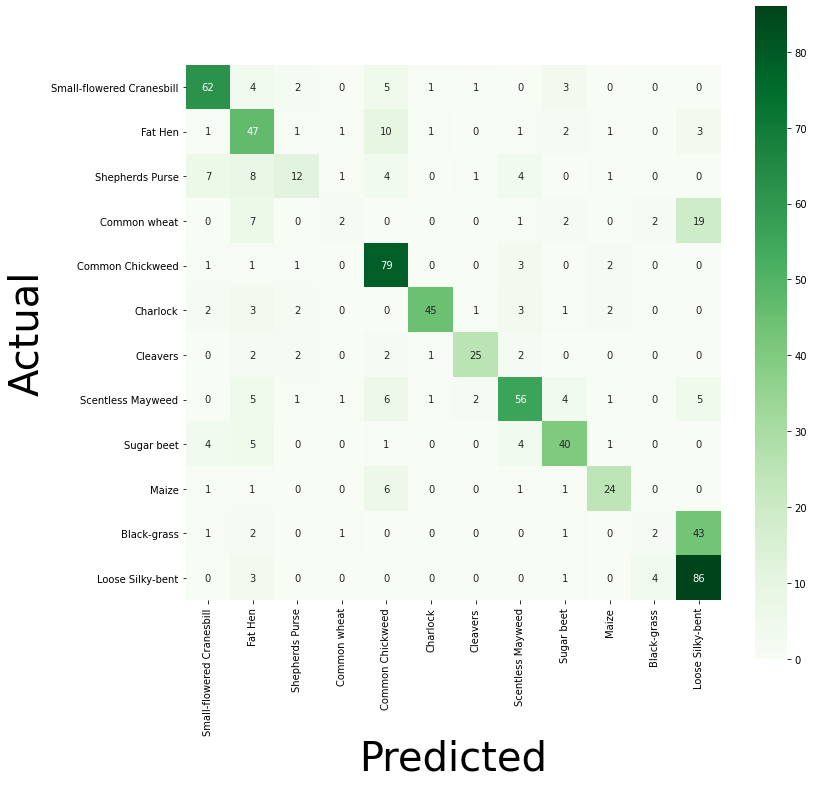

In [307]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=unique_labels, yticklabels=unique_labels)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

### Step 6 - Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [324]:
print('The expected label for X_test[2] is ', unique_labels[y_test[2].argmax()], ' and the actual is ', unique_labels[Y_true[2]])
print('The expected label for X_test[3] is ', unique_labels[y_test[3].argmax()], ' and the actual is ', unique_labels[Y_true[3]])
print('The expected label for X_test[33] is ', unique_labels[y_test[33].argmax()], ' and the actual is ', unique_labels[Y_true[33]])
print('The expected label for X_test[36] is ', unique_labels[y_test[36].argmax()], ' and the actual is ', unique_labels[Y_true[36]])
print('The expected label for X_test[59] is ', unique_labels[y_test[59].argmax()], ' and the actual is ', unique_labels[Y_true[59]])


The expected label for X_test[2] is  Sugar beet  and the actual is  Sugar beet
The expected label for X_test[3] is  Cleavers  and the actual is  Cleavers
The expected label for X_test[33] is  Cleavers  and the actual is  Cleavers
The expected label for X_test[36] is  Black-grass  and the actual is  Black-grass
The expected label for X_test[59] is  Maize  and the actual is  Maize
